In [1]:
import xgboost as xgb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
%matplotlib inline
import ROOT
from root_numpy import root2array, tree2array, fill_hist

Welcome to JupyROOT 6.07/07


In [3]:
columns = ['total_hits2', 'total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2','trueKE']
data = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root', branches=columns, treename='nu_eneNEW')

In [4]:
data_input = data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]
data_truth = data[['trueKE']]
data_input_n = data_input.view(data_input.dtype[0]).reshape(data_input.shape + (-1,))
data_truth_n = data_truth.view(data_truth.dtype[0]).reshape(data_truth.shape + (-1,))/1e3
print type(data_input_n), data_input_n.shape
print data_input_n[:2]
print data_truth_n[:2]

<type 'numpy.ndarray'> (13692, 6)
[[ 0.0684      0.12035     0.59982872  0.0947469   0.1531103   0.04513163]
 [ 0.0741      0.1279      0.02537002  0.57231373  0.02877181  0.25846085]]
[[ 0.62560872]
 [ 1.66906392]]


In [5]:
data_truth_n.shape

(13692, 1)

In [44]:
model = xgb.XGBRegressor(max_depth=3, learning_rate=0.05, subsample=0.1)
history = model.fit(data_input_n, data_truth_n)

In [45]:
predicted_energy = model.predict(data_input_n)
print predicted_energy[:2]

[ 0.77750045  0.46314359]


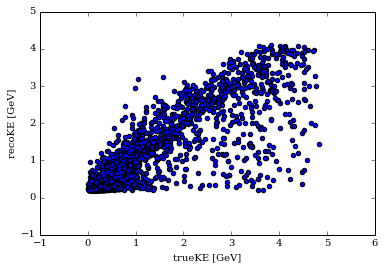

In [46]:
f, ax1 = plt.subplots(1, 1)
ax1.scatter(data_truth_n,predicted_energy)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")

In [47]:
chain = ROOT.TChain('nu_eneNEW')
for i in range(1040,1099):
    chain.Add('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_'+str(i)+'_CCQE_12in_energy_studies_recoquant_tree_NEWlookups.root')
test_data = tree2array(chain, branches=columns)

In [48]:
len(test_data)

20829

In [49]:
test_data_input = test_data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]
test_data_truth = test_data[['trueKE']]
test_data_input_n = test_data_input.view(test_data_input.dtype[0]).reshape(test_data_input.shape + (-1,))
#test_data_truth_n = test_data_truth.view(test_data_truth.dtype[0]).reshape(test_data_truth.shape + (-1,))/1e3
test_data_truth_n = test_data_truth.view(test_data_truth.dtype[0])/1e3

In [50]:
test_predicted_energy = model.predict(test_data_input_n)
test_predicted_energy.shape

(20829,)

(0, 2)

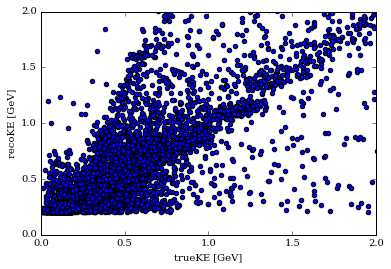

In [51]:
f, ax1 = plt.subplots(1, 1)
ax1.scatter(test_data_truth_n,test_predicted_energy)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")
ax1.set_ylim((0,2))
ax1.set_xlim((0,2))

In [52]:
res_twod = np.dstack((test_data_truth_n, np.abs(test_predicted_energy-test_data_truth_n)/test_data_truth_n))
res_twod[0]

array([[  3.24633320e-01,   1.08231617e+00],
       [  2.83931324e-01,   6.00001751e-04],
       [  2.03873127e-01,   1.03613135e+00],
       ..., 
       [  3.67801838e-01,   1.63440180e-02],
       [  3.03082722e-01,   9.13784233e-02],
       [  7.32825357e-02,   1.79520373e+00]])

Warning in <TROOT::Append>: Replacing existing TH1: name (Potential memory leak).


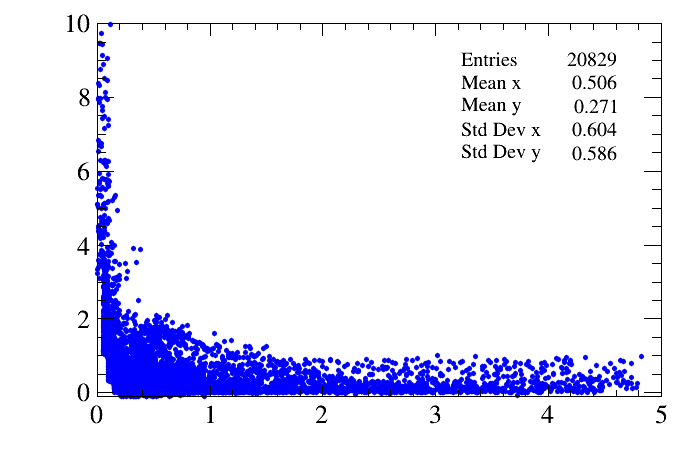

In [53]:
hist = ROOT.TH2D('name', 'title', 100, 0, 5, 100, -0.1, 10)
fill_hist(hist, res_twod[0])
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

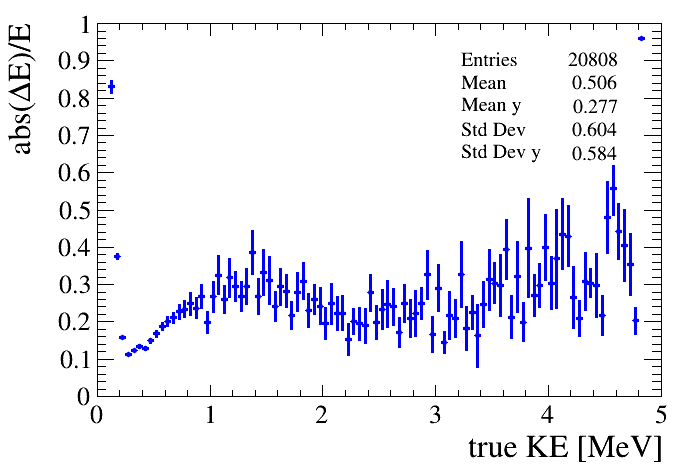

In [54]:
profile = hist.ProfileX()
profile.SetLineColor(ROOT.kBlue)
c1 = ROOT.TCanvas()
c1.SetLogy(0)
profile.SetMinimum(0)
profile.SetMaximum(1)
profile.GetXaxis().SetTitle('true KE [MeV]')
profile.GetYaxis().SetTitle('abs(#DeltaE)/E')
profile.Draw()
c1.Draw()

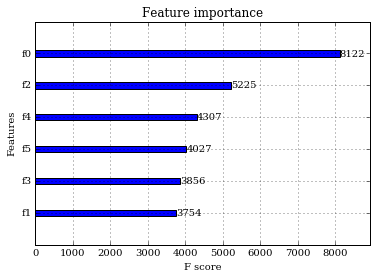

In [31]:
xgb.plot_importance(model)

In [18]:
model.get_params

<bound method XGBRegressor.get_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

In [19]:
model.get_xgb_params

<bound method XGBRegressor.get_xgb_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>